<a href="https://colab.research.google.com/github/s-a-malik/multi-few/blob/main/notebooks/FewShotImageClassificationDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improving Few-shot Image Classification using Class Descriptions
*Matthew Jackson, Shreshth Malik, Michael Matthews, Yousuf Mohamed-Ahmed*

This notebook is designed to introduce the dataset created, 'Zanim', as well as one of the models developed to address the task.

Let us begin by cloning the repository.

In [1]:
!rm -rf multi-few
!git clone https://github.com/s-a-malik/multi-few.git
%pip install -e multi-few

Cloning into 'multi-few'...
remote: Enumerating objects: 1430, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 1430 (delta 129), reused 110 (delta 72), pack-reused 1254
Receiving objects: 100% (1430/1430), 2.83 MiB | 21.13 MiB/s, done.
Resolving deltas: 100% (891/891), done.
Obtaining file:///content/multi-few
     |████████████████████████████████| 81kB 2.8MB/s 
     |████████████████████████████████| 15.3MB 409kB/s 
     |████████████████████████████████| 184kB 43.8MB/s 
     |████████████████████████████████| 4.1MB 35.8MB/s 
     |████████████████████████████████| 2.1MB 28.7MB/s 
     |████████████████████████████████| 9.9MB 34.7MB/s 
     |████████████████████████████████| 23.9MB 1.4MB/s 
     |████████████████████████████████| 1.5MB 31.6MB/s 
     |████████████████████████████████| 2.1MB 31.2MB/s 
     |████████████████████████████████| 133kB 44.8MB/s 
     |████████████████████████████████| 174kB 28.9MB/s 
   

To ensure that the library is installed, **restart the runtime now** (it'll help if you run all the subsequent cells now).

Once you've restarted the runtime, run the following cell to download the dataset and some pre-computed embeddings to use during inference.

The following should take a few minutes to complete.

In [12]:
import gdown
links = ["https://drive.google.com/uc?id=1cT6klPSkCY3tnhXtndmo-4Z9P85kg6j9", 
         "https://drive.google.com/uc?id=1tzZqrGZSK_e8vJfK6yRe4TvOeJ8uyP0e", 
         "https://drive.google.com/uc?id=1Ga68-VUt8wS8_P-xIM-csOYdasAmxo3n",
         "https://drive.google.com/uc?id=1xPzSyyUoqtCpVAL8L7JD2tkhZhGf_PpG",
         "https://drive.google.com/uc?id=1tPYYWJdz5rEEvcOJblni-JWng-XmFR7D"]
outputs = ["images.hdf5", "train.json", "image-embedding-resnet-152.hdf5", "am3.pth.tar", "fumi.pth.tar"]
for (l,o) in zip(links, outputs):
    gdown.download(l, o, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1cT6klPSkCY3tnhXtndmo-4Z9P85kg6j9
To: /content/images.hdf5
9.61GB [01:20, 119MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tzZqrGZSK_e8vJfK6yRe4TvOeJ8uyP0e
To: /content/train.json
77.8MB [00:00, 198MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ga68-VUt8wS8_P-xIM-csOYdasAmxo3n
To: /content/image-embedding-resnet-152.hdf5
1.60GB [00:08, 197MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xPzSyyUoqtCpVAL8L7JD2tkhZhGf_PpG
To: /content/am3.pth.tar
27.0MB [00:00, 189MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tPYYWJdz5rEEvcOJblni-JWng-XmFR7D
To: /content/fumi.pth.tar
8.92MB [00:00, 95.4MB/s]


# Explore the Dataset

The following cell launches a UI to explore the dataset, the description is shown in the text area on the left.

Type into the green cell to display some images for a particular animal in the dataset (or click the 'random animal' button).

Flick through the gallery with the 'next' and 'back' buttons.

To speed up things, whilst you're exploring the dataset, run the cell titled 'Run AM3 and FuMI on a custom task'.

In [1]:
from multifew.demo.dataset_explorer import DatasetExplorer
from multifew.demo.demo_data_parser import DemoDataParser
data = DemoDataParser()
DatasetExplorer(data)

Output()

Output()

## Run AM3 and FuMI on a custom task

The checkpoints will be loaded in the next cell (this may take a few minutes); but will allow for quick and easy inference on a custom task!

1. Select five animals from below (don't pick the same animal twice) by typing into the boxes below.
2. The support set is shown on the right; this is the set of images that the meta-learning model trains on before being tested on the 'query set'.
3. The text descriptions of each animal are shown in the text box.
3. Having selected the five animals you wish to use, click the 'Run AM3 and FuMI' button for a checkpointed AM3 and FuMI model to train on the support set.
4. The performance on the query set is shown below, correctly classified images are shown with a green border and incorrect classifications with a red border. The border on the **left indicates AM3** and the **right indicates FuMI**
5. Flip through the whole query set by clicking 'Next' and 'Back'.
6. Accuracy per class is shown in the graph beneath the query set.

### A few pointers
You can experiment to understand the failure cases of the models!
- For example, try creating a task with four similar animals and one very different animal (e.g. Minke Whale, Gray Whale, Killer Whale, Humpack whale vs a lion); you'll find it can only really learn the obvious class. The descriptions aren't enough to make up for the difficult whale photos which tend to be far away and full of water.
- On the other hand, try using five similar bird species e.g. Western Bluebird, Pied Crow, Australian Magpie, Clay-colored Thrush and American Robin; performance is suprisingly good only five examples of each.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Copying image embeddings to local disk
Completed tokenisation
Loading AM3 checkpoint
dictionary size:  5238
loading pretrained word vectors...
[==================================================] 100.0% 376.1/376.1MB downloaded
done. Embedding dim: 300. Number of OOV tokens: 153, padding token: 5237
Loaded am3.pth.tar, trained to epoch 360 with best loss 0.3266559238168788
Finished loading AM3 checkpoint
Loading FUMI checkpoint
Copying image embeddings to local disk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Completed tokenisation
dictionary size:  5179
loading pretrained word vectors...
done. Embedding dim: 300. Number of OOV tokens: 142, padding token: 5178
Loaded fumi.pth.tar, trained to epoch 47000 with best loss 0.4026160691634263
Finished loading FUMI checkpoint


Output()

Running AM3 on test species


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:01<18:26,  1.11s/it]


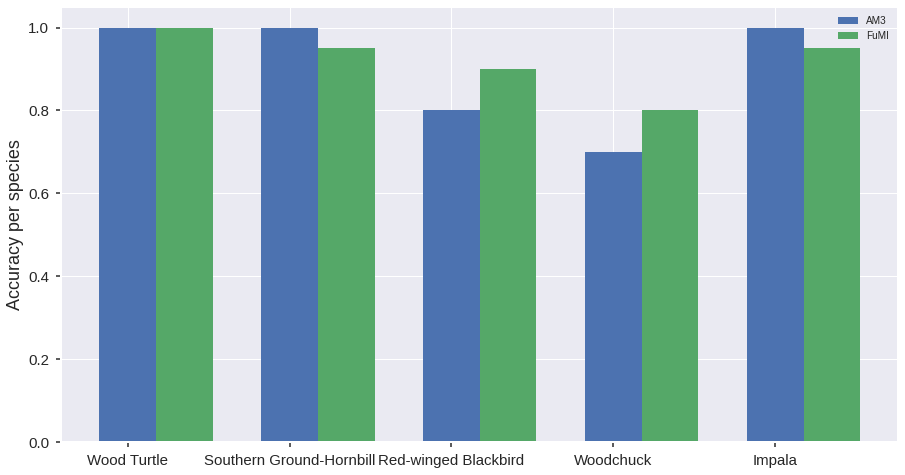

In [2]:
from multifew.demo.interactive_am3 import AM3Explorer
AM3Explorer(data)